# Support Data science project

## 1. Import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 2. Load the datasets
### - If multiple files, load each separately

In [ ]:
movies = pd.read_csv("/content/movie_details.csv")
companies = pd.read_csv("/content/companies.csv")
countries = pd.read_csv("/content/countries.csv")
genres = pd.read_csv("/content/genres.csv")
langs = pd.read_csv("/content/langs.csv")


## 3. Join/Merge datasets
### - Merge on common keys
### - Verify join results

In [ ]:
#checking for duplicates and removing them
print(movies.duplicated().sum())
print(companies.duplicated().sum())
print(countries.duplicated().sum())
print(genres.duplicated().sum())
print(langs.duplicated().sum())

13
61
16
41
18


In [ ]:
movies.drop_duplicates(inplace=True)
companies.drop_duplicates(inplace=True)
countries.drop_duplicates(inplace=True)
genres.drop_duplicates(inplace=True)
langs.drop_duplicates(inplace=True)

In [ ]:
print(movies.isna().sum())
print("#################")
print(companies.isna().sum())
print("#################")
print(countries.isna().sum())
print("#################")
print(genres.isna().sum())
print("#################")
print(langs.isna().sum())

adult                       0
backdrop_path              38
belongs_to_collection       0
budget                      0
homepage                 1202
id                          0
imdb_id                    49
original_language           0
original_title              0
overview                   20
popularity                  0
poster_path                 3
release_date                8
revenue                     0
runtime                     0
status                      0
tagline                   559
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64
#################
movie_id           0
company_name       0
country         4087
dtype: int64
#################
movie_id    0
country     0
dtype: int64
#################
movie_id    0
genre       0
dtype: int64
#################
movie_id    0
lang        0
dtype: int64


In [ ]:
companies.dropna(subset=["country"], inplace=True)

In [ ]:
#merging production country
prod_countries_grouped = (
    countries.groupby("movie_id")["country"]
    .apply(list)
    .reset_index()
)

movies = pd.merge(
    movies, prod_countries_grouped,
    left_on="id", right_on="movie_id", how="left"
)

movies.drop(columns=["movie_id"], inplace=True)

print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2988 non-null   bool   
 1   backdrop_path          2950 non-null   object 
 2   belongs_to_collection  2988 non-null   object 
 3   budget                 2988 non-null   int64  
 4   homepage               1786 non-null   object 
 5   id                     2988 non-null   int64  
 6   imdb_id                2939 non-null   object 
 7   original_language      2988 non-null   object 
 8   original_title         2988 non-null   object 
 9   overview               2968 non-null   object 
 10  popularity             2988 non-null   float64
 11  poster_path            2985 non-null   object 
 12  release_date           2980 non-null   object 
 13  revenue                2988 non-null   int64  
 14  runtime                2988 non-null   int64  
 15  stat

In [ ]:
#merging companies name
companies_grouped = (
    companies.groupby("movie_id")["company_name"]
    .apply(list)
    .reset_index()
)

movies = pd.merge(
    movies, companies_grouped,
    left_on="id", right_on="movie_id",how="left"
)

movies.drop(columns=["movie_id"], inplace=True)

print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2988 non-null   bool   
 1   backdrop_path          2950 non-null   object 
 2   belongs_to_collection  2988 non-null   object 
 3   budget                 2988 non-null   int64  
 4   homepage               1786 non-null   object 
 5   id                     2988 non-null   int64  
 6   imdb_id                2939 non-null   object 
 7   original_language      2988 non-null   object 
 8   original_title         2988 non-null   object 
 9   overview               2968 non-null   object 
 10  popularity             2988 non-null   float64
 11  poster_path            2985 non-null   object 
 12  release_date           2980 non-null   object 
 13  revenue                2988 non-null   int64  
 14  runtime                2988 non-null   int64  
 15  stat

In [ ]:
#merging movie languages
langs_grouped = (
    langs.groupby("movie_id")["lang"]
    .apply(list)
    .reset_index()
)

movies = pd.merge(
    movies, langs_grouped,
    left_on="id", right_on="movie_id",how="left"
)

movies.drop(columns=["movie_id"], inplace=True)

print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2988 non-null   bool   
 1   backdrop_path          2950 non-null   object 
 2   belongs_to_collection  2988 non-null   object 
 3   budget                 2988 non-null   int64  
 4   homepage               1786 non-null   object 
 5   id                     2988 non-null   int64  
 6   imdb_id                2939 non-null   object 
 7   original_language      2988 non-null   object 
 8   original_title         2988 non-null   object 
 9   overview               2968 non-null   object 
 10  popularity             2988 non-null   float64
 11  poster_path            2985 non-null   object 
 12  release_date           2980 non-null   object 
 13  revenue                2988 non-null   int64  
 14  runtime                2988 non-null   int64  
 15  stat

In [ ]:
#merging movie genres
genres_grouped = (
    genres.groupby("movie_id")["genre"]
    .apply(list)
    .reset_index()
)

movies = pd.merge(
    movies, genres_grouped,
    left_on="id", right_on="movie_id",how="left"
)

movies.drop(columns=["movie_id"], inplace=True)

print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2988 non-null   bool   
 1   backdrop_path          2950 non-null   object 
 2   belongs_to_collection  2988 non-null   object 
 3   budget                 2988 non-null   int64  
 4   homepage               1786 non-null   object 
 5   id                     2988 non-null   int64  
 6   imdb_id                2939 non-null   object 
 7   original_language      2988 non-null   object 
 8   original_title         2988 non-null   object 
 9   overview               2968 non-null   object 
 10  popularity             2988 non-null   float64
 11  poster_path            2985 non-null   object 
 12  release_date           2980 non-null   object 
 13  revenue                2988 non-null   int64  
 14  runtime                2988 non-null   int64  
 15  stat

## 4. Explore the dataset
### - Check size, column names, types, basic statistics

In [ ]:
print(movies.shape)
print(movies.columns)
print(movies.dtypes)
print(movies.describe())

(2988, 25)
Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'country', 'company_name', 'lang', 'genre'],
      dtype='object')
adult                       bool
backdrop_path             object
belongs_to_collection     object
budget                     int64
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
release_date              object
revenue                    int64
runtime                    int64
status                    object
tagline                   object
title                     object
video           

## 5. Clean the dataset
### - Handle missing values
### - Remove duplicates or irrelevant columns
### - Convert categorical columns if needed

In [ ]:
print(movies.isnull().sum())

list_columns = [
    'genre', 'lang', 'company_name', 'country'
]
non_list_columns = [
    'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'release_date',
    'revenue', 'runtime', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'
]

print(movies.duplicated(subset=non_list_columns).sum())

adult                       0
backdrop_path              38
belongs_to_collection       0
budget                      0
homepage                 1202
id                          0
imdb_id                    49
original_language           0
original_title              0
overview                   20
popularity                  0
poster_path                 3
release_date                8
revenue                     0
runtime                     0
status                      0
tagline                   559
title                       0
video                       0
vote_average                0
vote_count                  0
country                     0
company_name              170
lang                       13
genre                      13
dtype: int64
0


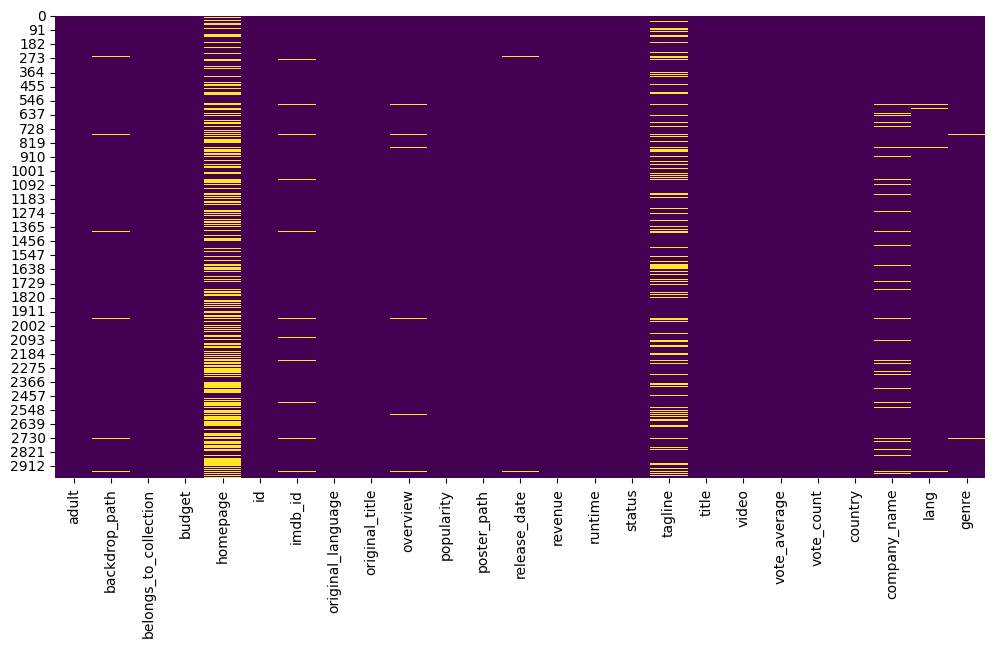

In [ ]:

plt.figure(figsize=(12,6))
sns.heatmap(movies.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
movies.drop(columns=['tagline','homepage','imdb_id','backdrop_path','poster_path', 'id'], inplace=True)

# Fill all missing values
movies.fillna({
    'company_name': 'Unknown',
    'genre': 'Unknown',
    'lang': 'Unknown',
    'overview': 'Unknown'
}, inplace=True)

# Handle release_date alone
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_date'] = movies['release_date'].fillna(movies['release_date'].mode()[0])

print(movies.isna().sum())


adult                    0
belongs_to_collection    0
budget                   0
original_language        0
original_title           0
overview                 0
popularity               0
release_date             0
revenue                  0
runtime                  0
status                   0
title                    0
video                    0
vote_average             0
vote_count               0
country                  0
company_name             0
lang                     0
genre                    0
dtype: int64


## 6. Visualize the data
### - Show target variable distribution (if available)
### - Explore relationships between variables

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,country,company_name,lang,genre
0,False,The Wild Robot Collection,78000000,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",877.206,2024-09-12,324816010,102,Released,The Wild Robot,False,8.360,4117,[US],[DreamWorks Animation],[English],"[Animation, Action, Science Fiction, Family]"
1,False,False,18000000,en,Elevation,A single father and two women venture from the...,850.024,2024-11-07,3300000,91,Released,Elevation,False,6.300,376,[US],"[Lyrical Media, Fuller Media, Inspire Entertai...",[English],"[Action, Science Fiction, Thriller]"
2,False,False,4350000,en,Memoir of a Snail,Forcibly separated from her twin brother when ...,844.764,2024-10-17,1189972,94,Released,Memoir of a Snail,False,7.676,108,[AU],"[Arenamedia, Screen Australia]","[English, French]","[Animation, Drama, Comedy]"
3,False,Fault Collection,0,es,Culpa tuya,The love between Noah and Nick seems unwaverin...,819.363,2024-12-26,0,118,Released,Your Fault,False,7.171,942,"[ES, US]","[Pokeepsie Films, Amazon MGM Studios]",[Spanish],"[Romance, Drama]"
4,False,False,3500000,lv,Straume,"A solitary cat, displaced by a great flood, fi...",817.351,2024-08-29,11019823,85,Released,Flow,False,8.400,916,[LV],"[Dream Well Studio, Sacrebleu Productions, Tak...",[No Language],"[Animation, Fantasy, Adventure]"


Text(0.5, 1.0, 'Profitability Distribution')

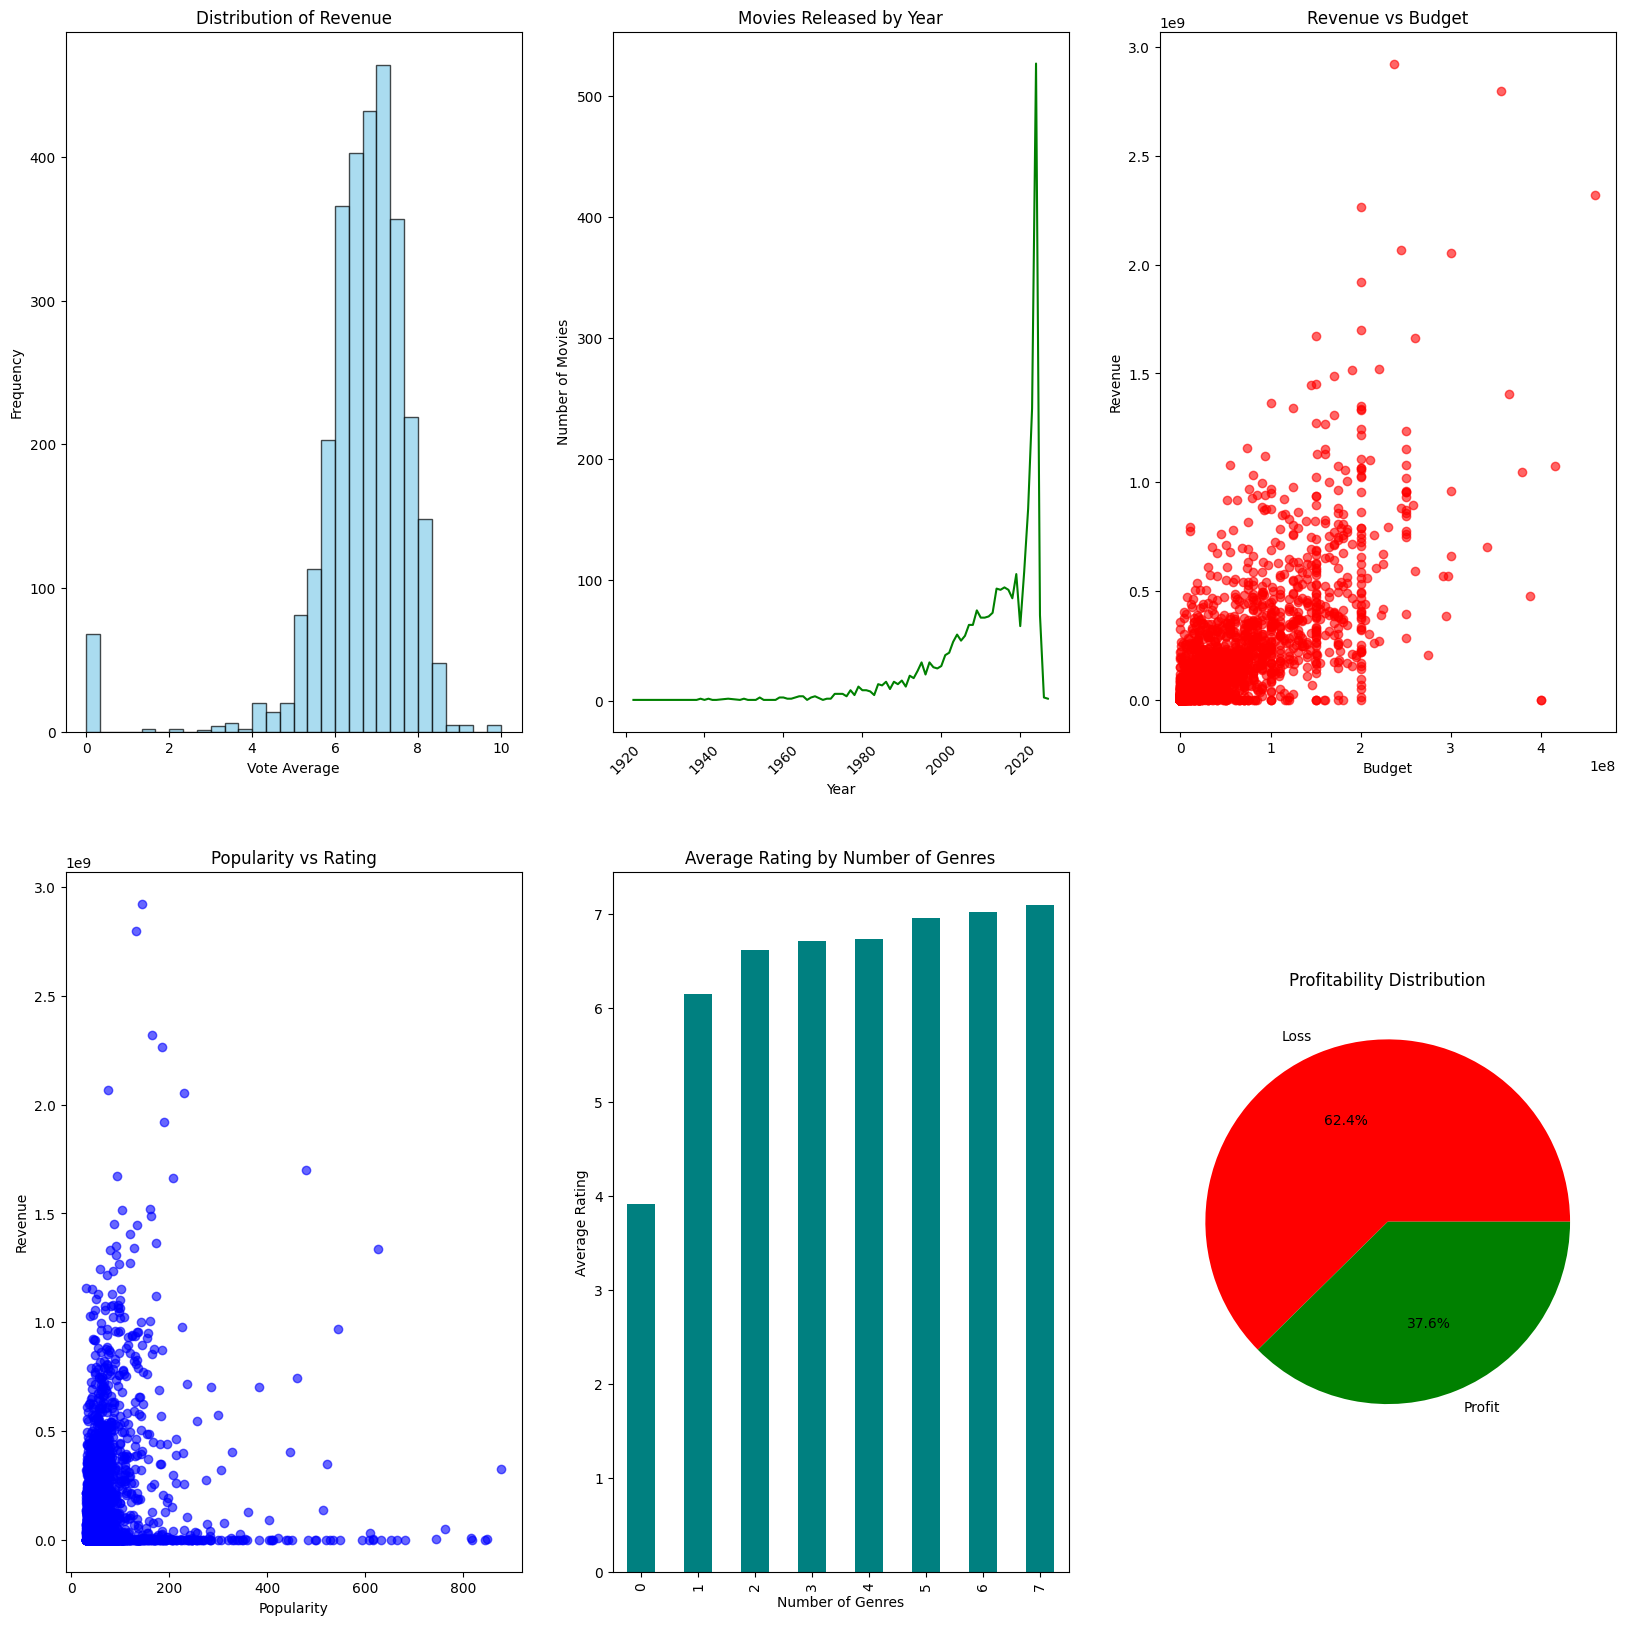

In [ ]:
# 1. Distribution of revenu
plt.subplot(2, 3, 1)
plt.hist(movies['vote_average'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')

# 2. Movies by release year
plt.subplot(2, 3, 2)
year_counts = movies['release_date'].dt.year.value_counts().sort_index()
year_counts.plot(kind='line', color='green')
plt.title('Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# 3. Revenue vs Budget scatter plot
plt.subplot(2, 3, 3)
plt.scatter(movies['budget'], movies['revenue'], alpha=0.6, color='red')
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')



# 4. Popularity vs Rating
plt.subplot(2, 3, 4)
plt.scatter(movies['popularity'], movies['revenue'], alpha=0.6, color='blue')
plt.title('Popularity vs Rating')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

# 5. Number of genres vs rating
movies['num_genres'] = movies['genre'].apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.subplot(2, 3, 5)
genre_rating = movies.groupby('num_genres')['vote_average'].mean()
genre_rating.plot(kind='bar', color='teal')
plt.title('Average Rating by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Average Rating')

# 6. Profitability distribution
movies['profit'] = movies['revenue'] - movies['budget']
movies['is_profitable'] = (movies['profit'] > 0).astype(int)

plt.subplot(2, 3, 6)
profit_status = movies['is_profitable'].value_counts()
profit_labels = ['Loss', 'Profit']
plt.pie(profit_status, labels=profit_labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Profitability Distribution')

## 7. Build Machine Learning models
### - Split data into train/test sets
### - Train at least 3 different models
### - Evaluate their performance

In [ ]:
labelEncoder = LabelEncoder()

# Convert list columns to strings
list_cols = ['country', 'company_name', 'lang', 'genre', 'belongs_to_collection']
for col in list_cols:
    # Check if the column exists and contains lists before applying join
    if col in movies.columns and movies[col].apply(lambda x: isinstance(x, list)).any():
        movies[col] = movies[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# loop on the train data columns
for col in movies.columns :
  if(movies[col].dtype=='object' or movies[col].dtype =='bool'):
    movies[col] = labelEncoder.fit_transform(movies[col])

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,video,vote_average,vote_count,country,company_name,lang,genre,num_genres,profit,is_profitable
0,0,526,78000000,8,2380,536,877.206,2024-09-12,324816010,102,...,0,8.360,4117,125,629,65,284,4,246816010,1
1,0,149,18000000,8,646,340,850.024,2024-11-07,3300000,91,...,0,6.300,376,125,1127,65,141,3,-14700000,0
2,0,149,4350000,8,1288,1306,844.764,2024-10-17,1189972,94,...,0,7.676,108,7,179,84,333,3,-3160028,0
3,0,153,0,9,498,2376,819.363,2024-12-26,0,118,...,0,7.171,942,61,1563,417,845,2,0,0
4,0,149,3500000,21,1874,351,817.351,2024-08-29,11019823,85,...,0,8.400,916,97,628,399,381,3,7519823,1


In [ ]:
movies.dtypes

,0
adult,int64
belongs_to_collection,int64
budget,int64
original_language,int64
original_title,int64
overview,int64
popularity,float64
release_date,datetime64[ns]
revenue,int64
runtime,int64


### Feature Selection

In [ ]:
# giving the corelation between the features and the target
correlation_with_target = movies.corr()['revenue'].sort_values(ascending=False)
print(correlation_with_target)

revenue                  1.000000
profit                   0.982222
budget                   0.732453
vote_count               0.717722
is_profitable            0.436682
runtime                  0.293633
belongs_to_collection    0.215424
num_genres               0.205303
country                  0.197070
vote_average             0.185324
popularity               0.105500
status                   0.058246
overview                 0.037990
company_name             0.017127
title                    0.001556
original_title          -0.072564
release_date            -0.076781
lang                    -0.160467
original_language       -0.179856
genre                   -0.209777
adult                         NaN
video                         NaN
Name: revenue, dtype: float64


In [ ]:
movies.drop(columns=['title', 'company_name','adult','video', 'overview'], inplace=True)

In [ ]:
X = movies.drop("revenue", axis=1)  # all columns except target
y = movies["revenue"]

In [ ]:
X["timestamp"] = X["release_date"].astype("int64") // 10**9
X.head()
X.drop(columns=["release_date"], inplace=True)

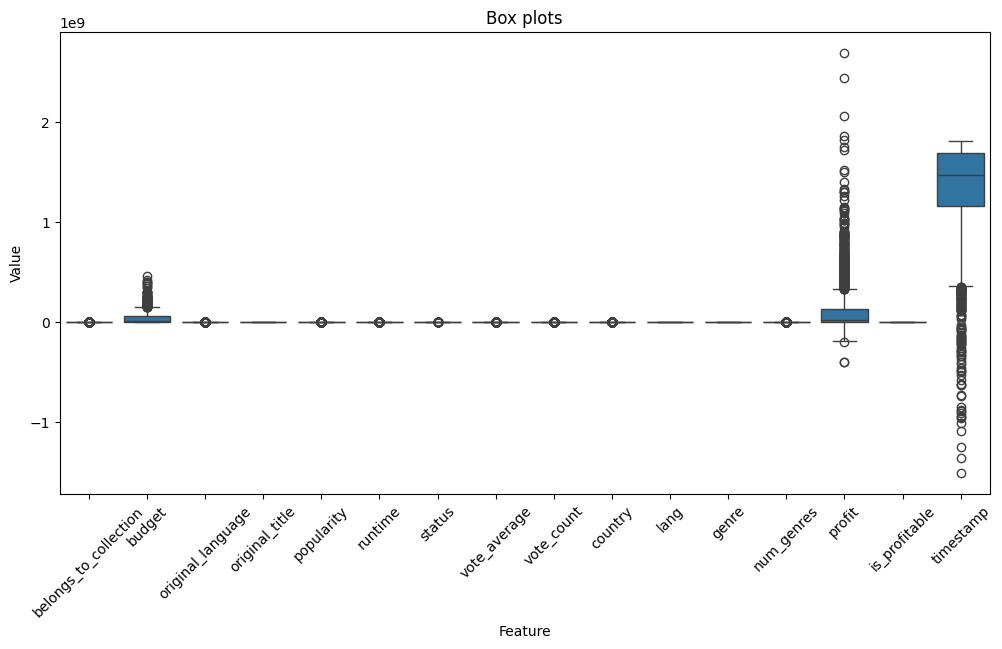

In [ ]:
def plot_correlation_matrix():
  numeric_data = X.select_dtypes(include='number')
  melted = numeric_data.melt(var_name="Feature", value_name="Value")

  # Plot
  plt.figure(figsize=(12, 6))
  plt.title("Box plots")
  sns.boxplot(x="Feature", y="Value", data=melted)
  plt.xticks(rotation=45)
  plt.show()

plot_correlation_matrix()

In [ ]:
# we can use (IQR , ZScore)
# Get the cols dtype (numbers)
cols = X.select_dtypes(include=np.number).columns

for col in cols:
  # this is using the quantiles but we can use percentiles(5 and 95 with the data.clip(lower=train[col].quantile(0.05) , upper=train[col].quantile(0.95)))
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - IQR * 1.5
  upper_bound = Q3 + IQR * 1.5
  X[col] = X[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)) # lambda and ternary condition

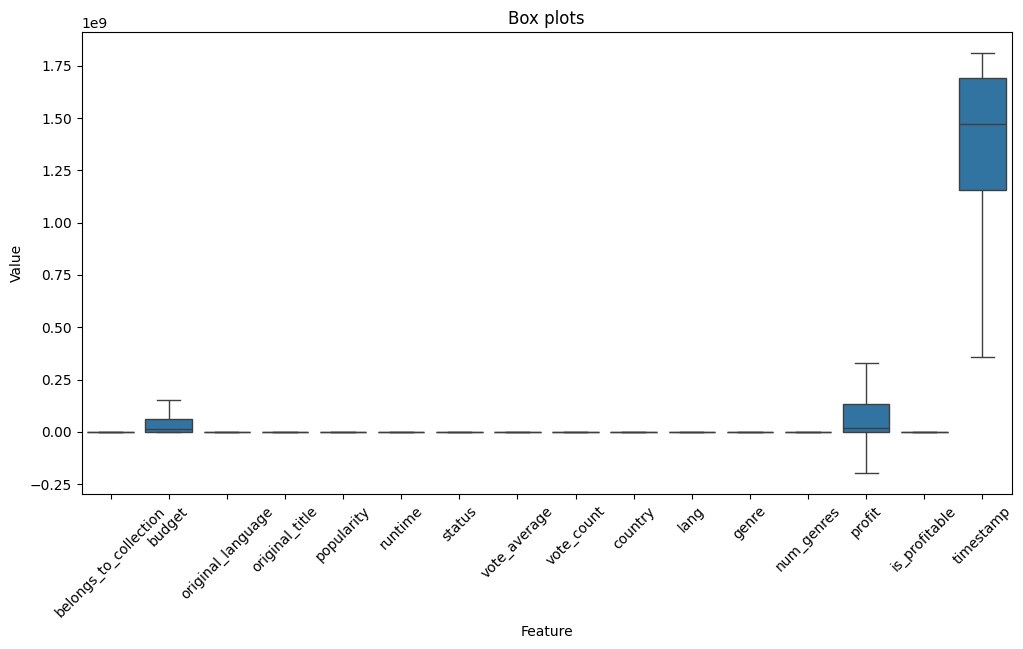

In [ ]:
plot_correlation_matrix()

### Normalizing The Data

In [ ]:
scaler=MinMaxScaler()
X_scaler=scaler.fit_transform(X)

X=pd.DataFrame(X_scaler,columns=X.columns)

In [ ]:
X.head()

,belongs_to_collection,budget,original_language,original_title,popularity,runtime,status,vote_average,vote_count,country,lang,genre,num_genres,profit,is_profitable,timestamp
0,1.000000,0.520000,0.0,0.810627,1.0,0.455357,0.0,0.832627,0.299358,0.767196,0.145740,0.283151,0.875,0.842466,1.0,0.942641
1,0.375000,0.120000,0.0,0.220027,1.0,0.357143,0.0,0.396186,0.027340,0.767196,0.145740,0.140578,0.625,0.347158,0.0,0.945970
2,0.375000,0.029000,0.0,0.438692,1.0,0.383929,0.0,0.687712,0.007853,0.000000,0.188341,0.332004,0.625,0.369015,0.0,0.944722
3,0.391064,0.000000,0.0,0.169619,1.0,0.598214,0.0,0.580720,0.068495,0.089947,0.934978,0.842473,0.375,0.375000,0.0,0.948883
4,0.375000,0.023333,0.0,0.638283,1.0,0.303571,0.0,0.841102,0.066605,0.470899,0.894619,0.379860,0.625,0.389242,1.0,0.941809


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
y_train = np.log1p(y_train)   # log(1 + y)
y_test = np.log1p(y_test)

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
import numpy as np

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(
    n_estimators=200,   # number of trees
    learning_rate=0.1,  # step size
    max_depth=3,        # depth of trees
    random_state=42
)

# Train model
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 1 - (rmse / np.mean(y_test))

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.4f}")


RMSE: 1.9295
MAE: 0.6273
R²: 0.9484
MAPE: inf%
Accuracy: 0.8453


In [ ]:
# --- SVM Regressor ---

svm_model = SVR(
    kernel='rbf',   # 'linear', 'poly', or 'rbf' (Gaussian, good default)
    C=100,          # regularization strength
    gamma=0.1,      # kernel coefficient (auto/tuned)
    epsilon=0.1     # insensitive zone around predictions
)

# Train model
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae = mean_absolute_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)
accuracy = 1 - (rmse / np.mean(y_test))

print("=== SVM Regression Results ===")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")


=== SVM Regression Results ===
RMSE: 3.2710
MAE: 1.2033
R²: 0.8517
Accuracy: 0.7378


In [ ]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lin = linear_reg.predict(X_test)
print("Linear Regression -> MSE: {:.2f}, R²: {:.2f}".format(mean_squared_error(y_test, y_pred_lin), r2_score(y_test, y_pred_lin)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
accuracy = 1 - (rmse / np.mean(y_test))
print(f"Accuracy: {accuracy:.4f}")

Linear Regression -> MSE: 13.06, R²: 0.82
Accuracy: 0.7103


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)
accuracy = 1 - (rmse / np.mean(y_test))
print(f"Accuracy: {accuracy:.4f}")

RMSE: 2.1444814099271716
R² Score: 0.9362572844081551
Accuracy: 0.8281


## 8. Compare results and give conclusions